# 02 - PCA analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/heart_disease_clean.csv")
# Ensure numeric columns exist
numeric_cols = ["age","trestbps","chol","thalach","oldpeak"]
X = df.drop(columns=["target"])
y = df["target"]


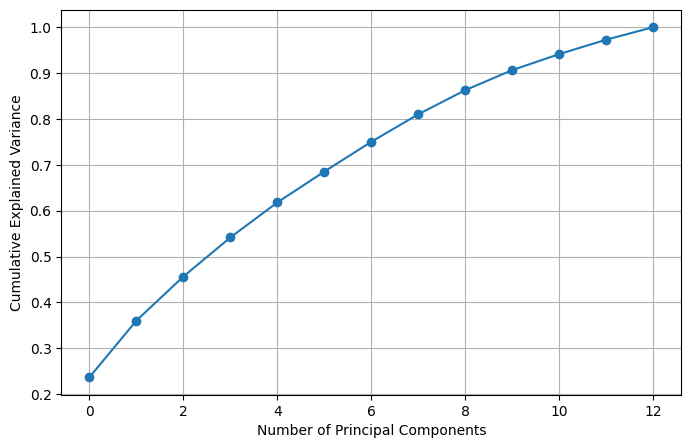

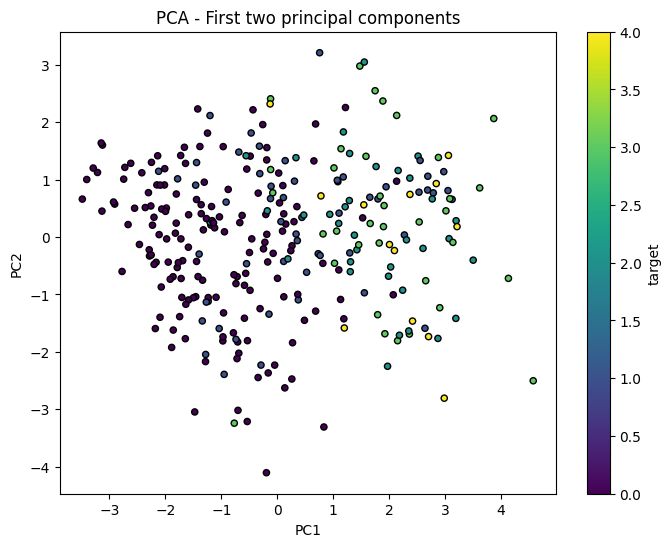

In [2]:
X_temp_scaled = StandardScaler().fit_transform(X)  # scale all columns (preprocessor used later)
pca = PCA()
X_pca_full = pca.fit_transform(X_temp_scaled)

cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(cum_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Choose n_components (example: n_components = 13 as in original)
n_components = 13
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_temp_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA - First two principal components")
plt.colorbar(label="target")
plt.show()
